In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pickle

In [12]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("../scripts"))))

In [3]:
from scripts.missing_value import check_missing_value

In [14]:
data1 = pd.read_csv("../data/train.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_15476\3353081738.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("../data/train.csv")


In [15]:
data1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [17]:
check_missing_value(data1)

Series([], dtype: int64)


Series([], dtype: int64)

In [32]:
data2 = pd.read_csv("../data/store.csv")
data3=pd.read_csv("../data/test.csv")

In [19]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Task 1 - Exploration of Customer Purchasing Behavior
1.1 Data Cleaning and Pre-processing

In [21]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load data
#data1 = pd.read_csv('data1.csv')
#data2 = pd.read_csv('data2.csv')

# Check for missing values
logging.info('Checking for missing values')
logging.info(data1.isnull().sum())
logging.info(data2.isnull().sum())



2025-01-03 19:17:18,782 - INFO - Checking for missing values
2025-01-03 19:17:18,909 - INFO - Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
2025-01-03 19:17:18,913 - INFO - Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


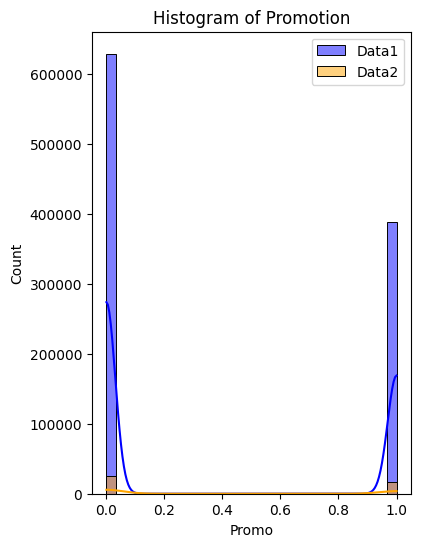

In [34]:
from scipy import stats
#●	Check for distribution in both training and test sets
# Assuming 'promotion' is the column name for the promotion data in both datasets

# Visualize the distributions
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data1['Promo'], color='blue', label='Data1', bins=30, kde=True, alpha=0.5)
sns.histplot(data3['Promo'], color='orange', label='Data2', bins=30, kde=True, alpha=0.5)
plt.title('Histogram of Promotion')
plt.legend()

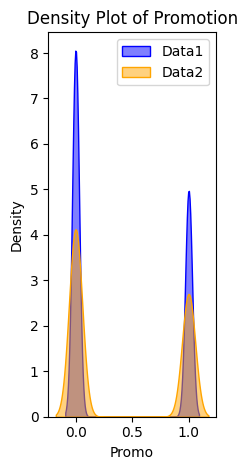

In [35]:
# Density Plot
plt.subplot(1, 3, 3)
sns.kdeplot(data1['Promo'], color='blue', label='Data1', fill=True, alpha=0.5)
sns.kdeplot(data3['Promo'], color='orange', label='Data2', fill=True, alpha=0.5)
plt.title('Density Plot of Promotion')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Merge datasets
data = pd.merge(data1, data2, on='Store')

In [38]:
#●	Check & compare sales behavior before, during, and after holidays
# Sample data structure: ensure date is in datetime format
data['sales_date'] = pd.to_datetime(data['Date'])
#data2['sales_date'] = pd.to_datetime(data2['sales_date'])

# Define holiday periods (example: Christmas)
holidays = {
    'Christmas': {'start': '2022-12-24', 'end': '2022-12-26'},
    # Add more holidays as needed
}

In [22]:
# Merge datasets
data = pd.merge(data1, data2, on='Store')

2025-01-03 19:18:22,154 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 19:18:23,016 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


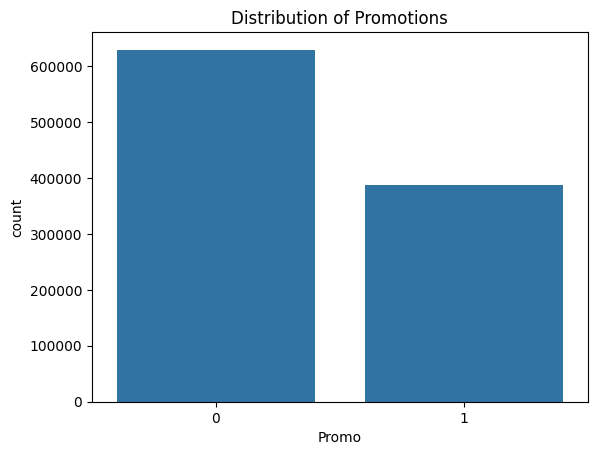

In [23]:
#Exploratory Data Analysis
# Check distribution of promotions
sns.countplot(x='Promo', data=data)
plt.title("Distribution of Promotions")
plt.show()

2025-01-03 19:19:02,676 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 19:19:02,689 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


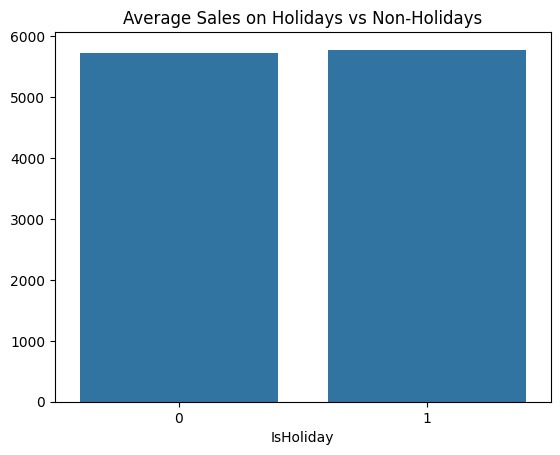

In [24]:
# Analyze sales behavior before, during, and after holidays
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['IsHoliday'] = data['StateHoliday'].apply(lambda x: 1 if x != 0 else 0)

holiday_sales = data.groupby('IsHoliday')['Sales'].mean()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Average Sales on Holidays vs Non-Holidays')
plt.show()

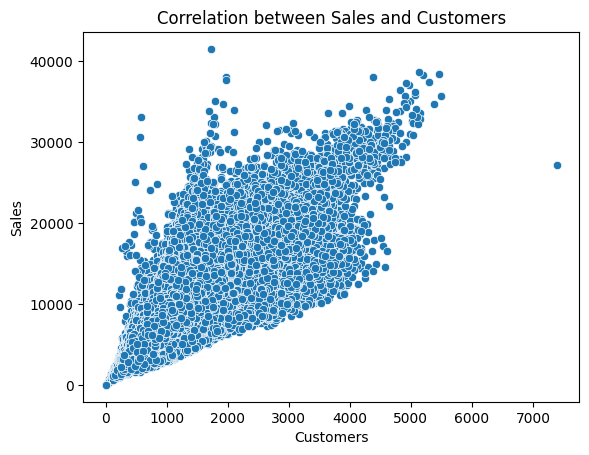

In [25]:
# Correlation between Sales and Customers
sns.scatterplot(x='Customers', y='Sales', data=data)
plt.title("Correlation between Sales and Customers")
plt.show()

Task 2 - Prediction of Store Sales

In [27]:
#2.1 Preprocessing
# Feature engineering
data['Weekday'] = data['Date'].dt.dayofweek
data['Weekend'] = np.where(data['DayOfWeek'] >= 5, 1, 0)

# Calculate days until holiday
data['DaysToHoliday'] = (pd.to_datetime('2015-12-25') - data['Date']).dt.days

# Calculate days after last holiday
# Assumption: calculating days since the last holiday only for dates after the last holiday
last_holiday_date = data[data['IsHoliday'] == 1]['Date'].max()
data['DaysAfterHoliday'] = data['Date'].apply(lambda x: (x - last_holiday_date).days if x > last_holiday_date else 0)

In [28]:
# Scaling features
features = ['Customers', 'Promo', 'IsHoliday', 'Weekday', 'Weekend', 'DaysToHoliday', 'DaysAfterHoliday']
X = data[features]
y = data['Sales']

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#2.2 Building Models with Sklearn Pipelines
# Build RandomForest Regressor Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_regressor', RandomForestRegressor(n_estimators=100))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate and log error
mse = mean_squared_error(y_test, y_pred)
logging.info(f'Mean Squared Error: {mse}')

2025-01-03 19:38:59,547 - INFO - Mean Squared Error: 2190478.926994093
